# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [33]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [34]:
# 데이터 로드
data = pd.read_csv("abalone.csv")
print(data.head())
print(data.shape)

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)
X = data.values.astype(float)

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
(4177, 9)


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [35]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [36]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (2923, 10), X_test shape: (1254, 10)
y_train shape: (2923,), y_test shape: (1254,)


## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [37]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [38]:
#릿지모델 생성 및 훈련
ridge_model_03 = Ridge(alpha=0.3, random_state=42)
ridge_model_03.fit(X_train, y_train)

#예측값 구하기
y_pred_03 = ridge_model_03.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_test_age = y_test + 1.5
y_pred_age_03 = y_pred_03 + 1.5

#MSE와 RMSE구하기
mse_03 = mean_squared_error(y_test, y_pred_03)
rmse_03 = np.sqrt(mse_03)

print(f"MSE: {mse_03}")
print(f"RMSE: {rmse_03}")

MSE: 5.013158686100955
RMSE: 2.239008415817358


3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [39]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

In [40]:
feature_names = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'M', 'F', 'I']
coefficients = pd.Series(ridge_model_03.coef_, index=feature_names)
print(coefficients)

Length             1.730623
Diameter           8.561149
Height             6.400273
Whole weight       8.006314
Shucked weight   -18.870049
Viscera weight    -8.934170
Shell weight      10.532604
M                  0.330514
F                  0.238986
I                 -0.569500
dtype: float64


각 피처가 타겟 변수를 예측하는 데 미치는 가중치(영향력)을 알 수 있다.

3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [41]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [42]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
rmse_list = []
for alpha in alphas:
  ridge_model_cv = Ridge(alpha=alpha, random_state=0)
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge_model_cv, X, y, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  rmse_list.append(avg_rmse)
  print(f"평균 RMSE: {avg_rmse}")

best_alpha_index = np.argmin(rmse_list)
best_alpha = alphas[best_alpha_index]
min_rmse = rmse_list[best_alpha_index]
print(f"RMSE가 최소가 되는 최적 alpha: {best_alpha}, 그때 RMSE: {min_rmse}")

평균 RMSE: 2.244617415600131
평균 RMSE: 2.2371368259830495
평균 RMSE: 2.230321200422364
평균 RMSE: 2.3372805091310007
평균 RMSE: 2.621188059927813
RMSE가 최소가 되는 최적 alpha: 1, 그때 RMSE: 2.230321200422364


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [43]:
# 필요한 모듈 임포트
import xgboost as xgb

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [44]:
#모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=0, tree_method='hist')
xgb_model.fit(X_train, y_train)

#예측값 구하기
y_pred_xgb = xgb_model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age_xgb = y_pred_xgb + 1.5

#MSE와 RMSE 구하기
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")


MSE: 4.859826564788818
RMSE: 2.2045014322492102


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

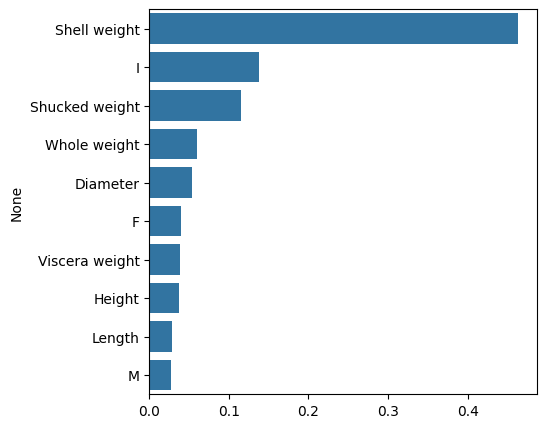

In [45]:
import seaborn as sns
%matplotlib inline
feature_importances = pd.Series(xgb_model.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(5, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.show()


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [46]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [47]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [48]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [49]:
logistic_model = LogisticRegression(max_iter=5000,random_state=0)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [50]:
#기울기
coefficients = logistic_model.coef_
print(coefficients)

[[ 5.40119857e-01  5.55141609e-01  6.20476859e-01 -2.58233732e-01
  -1.45090139e-04  2.55690914e-01  7.52039277e-01  8.78394493e-02
   1.63790241e-01  1.96653394e-01  1.22113689e-02  5.19222294e-01
   8.77112451e-03]
 [-6.96442843e-01 -9.22500438e-01 -7.03121269e-01  1.51118933e-01
  -4.31236620e-02  3.12399569e-01  1.59485268e-01  1.17931800e-02
   3.72214630e-01 -9.37234424e-01  2.86879368e-01  1.35291197e-01
  -7.77953721e-03]
 [ 1.56322986e-01  3.67358828e-01  8.26444092e-02  1.07114799e-01
   4.32687521e-02 -5.68090483e-01 -9.11524545e-01 -9.96326293e-02
  -5.36004871e-01  7.40581030e-01 -2.99090737e-01 -6.54513491e-01
  -9.91587312e-04]]


In [51]:
#절편
intercepts = logistic_model.intercept_
print(intercepts)

[-15.57767711  22.74821606  -7.17053895]


3-3) 모델의 정확도를 구하세요.

In [52]:
#모델의 예측값 구하기
y_pred = logistic_model.predict(x_test)
print(y_pred)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

[2 1 2 1 1 2 0 2 2 1 2 2 2 0 0 2 1 1 0 1 2 2 2 2 1 2 2 0 0 0 0 0 1 1 2 1 2
 0 1 1 2 2 0 0 1 0 0 1 0 1 1 2 2 1]
0.9629629629629629
